# Time Series Analysis using Pandas in Python
This is one of the most in-depth tutorials I've ever found, much less for time-series analysis.

Ref: https://towardsdatascience.com/time-series-analysis-using-pandas-in-python-f726d87a97d8

And: https://towardsdatascience.com/time-series-modeling-using-scikit-pandas-and-numpy-682e3b8db8d1


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url)
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [17]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [18]:
# Incredibly common for time-series analysis, always a good idea
data = data.set_index('Date')
data.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

An important thing to note in the above output is that `freq=None`. This says that we don't know how *often* the data was collected, but looking at the index we can infer that it's daily. We can correct that doing the following:

In [19]:
data_freq = data.asfreq('D') # Daily
# Refer to the first Ref for other frequencies
data_freq.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq='D')

Important to note though is that when we assign the frequency as daily then any days missing will be inserted as empty rows so that we have every single day from 2006-2017. To correct this we can use `method='ffill'`, or *forward fill*, in `asfreq` like this: `data.asfreq('D', method='ffill')`. "This means when a null is encountered for a particular column, it will be replaced by the value in the previous row." I'll use the other option:

In [20]:
# data = data.ffill()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


This doesn't change anything for our current dataset as they've already cleaned the data prior to providing it.

## Weekly Resampling Example
The mean of the whole week.

Bins: Jan1-Jan7, Jan8-Jan14, Jan15-Jan21, etc.

In [22]:
data_weekly_mean = data[data.columns].resample('W').mean()
# W is weekly
data_weekly_mean

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


## Rolling Windows Example
Similar to resmapling, but has overlapping time bins.

Bins: Jan1-Jan7, Jan2-Jan8, Jan3-Jan9, etc.

In [25]:
data_7d_roll = data.rolling(window=7, center=True).mean()
# Center means that it places the mean at the center of the 7 day window
# Which is why the first and last 3 rows are blank - we don't have enough
# surrounding data for their rolling windows.
data_7d_roll

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1208.214129,617.734286,17.807143,635.541429
2017-12-28,1203.265211,604.699143,19.240143,623.939286
2017-12-29,NaN,NaN,NaN,NaN


Rolling windows are most useful when assessing the **trend** of a dataset.

"Trend is the smooth long term tendency of a time series. It might change direction (increase or decrease) as time progresses."

Look at the below example:

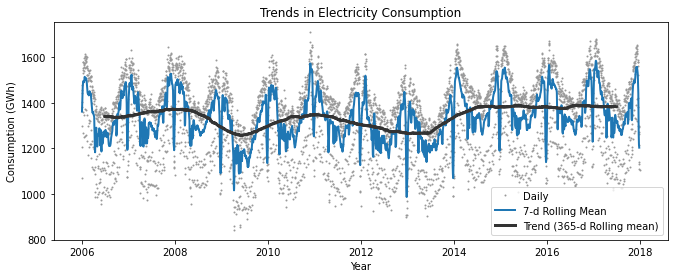

In [28]:
data_365d_roll = data.rolling(window=365, center=True).mean()

fig, ax = plt.subplots(figsize=(11,4))

# plotting daily data
ax.plot(data['Consumption'],
    marker='.', markersize=2, color='0.6', linestyle='None', label='Daily')

# plotting 7-day rolling data
ax.plot(data_7d_roll['Consumption'],
    linewidth=2, label='7-d Rolling Mean')

# plotting annual rolling data
ax.plot(data_365d_roll['Consumption'],
    color='0.2', linewidth=3, label='Trend (365-d Rolling mean)')

# Making it look nice :)
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')
plt.show()

## De-trending time-series